# Predicting The Attrition of the HR Employee datasets

In [18]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Importing the data

Reading the data

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The data consists of a number of variables [which are described on Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). I will be predicting *Attrition*: The values are Yes and No. I'll show the value counts of Yes and No

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

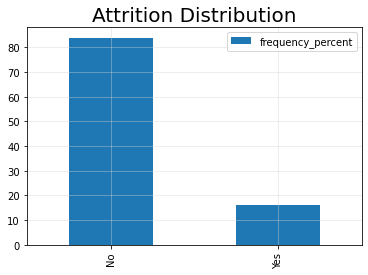

In [6]:
#plotting the frequency percent of the Attrition
attrition_freq = df[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()),2)


#plotting the frequency graph
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

From the graph, there seems to be high percent of No in the Attrition which might create some errors in the future. therefore im using the SMOTE technique to 

Now i'll be looking at different variables and how the relate with the Attrition values. i will also add two dummy variables in order to convert the Yes and No strings to 1 and 0 (respectively). This will be handy for prediction.

In [7]:
#creating integer constants to replace the values for Attrition. Im also doing the same for BusinesTravel

df.loc[df['Attrition']=='No','Attrition'] = 0
df.loc[df['Attrition']=='Yes','Attrition'] = 1

df['Business_Travel_Rarely']=0
df['Business_Travel_Frequently']=0
df['Business_Non-Travel']=0

df.loc[df['BusinessTravel']=='Travel_Rarely','Business_Travel_Rarely'] = 1
df.loc[df['BusinessTravel']=='Travel_Frequently','Business_Travel_Frequently'] = 1
df.loc[df['BusinessTravel']=='Non-Travel','Business_Non-Travel'] = 1
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,1,0,0


In [8]:
#using predictor gender to indicate 1 for male and 0 for female 
df.loc[df['Gender']=='Male','Gender'] = 1
df.loc[df['Gender']=='Female','Gender'] = 0
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,1,0,0


In [9]:
df['Sales']=0
df['R&D']=0
df['Dept_Human Resources'] =0

df.loc[df['Department']=='Sales','Sales'] = 1
df.loc[df['Department']=='Research & Development','R&D'] = 1
df.loc[df['Department']=='Human Resources','Dept_Human Resources'] = 1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Business_Travel_Rarely,Business_Travel_Frequently,Business_Non-Travel,Sales,R&D,Dept_Human Resources
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,1,0,0,1,0,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,0,1,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,1,0,0,0,1,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,1,0,0,0,1,0


In [10]:
Creating a new datafram with all the new variables
df_new = df[['Attrition','Age','DailyRate','YearsInCurrentRole','Business_Travel_Rarely','Business_Travel_Frequently','YearsInCurrentRole','Business_Non-Travel','Sales','R&D','Dept_Human Resources']]
df_new.head()

,Attrition,Age,DailyRate,YearsInCurrentRole,Business_Travel_Rarely,Business_Travel_Frequently,YearsInCurrentRole,Business_Non-Travel,Sales,R&D,Dept_Human Resources
0,1,41,1102,4,1,0,4,0,1,0,0
1,0,49,279,7,0,1,7,0,0,1,0
2,1,37,1373,0,1,0,0,0,0,1,0
3,0,33,1392,7,0,1,7,0,0,1,0
4,0,27,591,2,1,0,2,0,0,1,0


# Training the algorithm¶

I tried to use Random Forest to do the prediction but i got stuck so i used DecisionTree too but i also have an error. I dont know what to do next.

In [11]:
X = df_new.loc[:,'Age':'Dept_Human Resources'] #This gets all the columns from Age to Dept_Human Resources
y = df_new['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
X

,Age,DailyRate,YearsInCurrentRole,Business_Travel_Rarely,Business_Travel_Frequently,YearsInCurrentRole,Business_Non-Travel,Sales,R&D,Dept_Human Resources
0,41,1102,4,1,0,4,0,1,0,0
1,49,279,7,0,1,7,0,0,1,0
2,37,1373,0,1,0,0,0,0,1,0
3,33,1392,7,0,1,7,0,0,1,0
4,27,591,2,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1465,36,884,2,0,1,2,0,0,1,0
1466,39,613,7,1,0,7,0,0,1,0
1467,27,155,2,1,0,2,0,0,1,0
1468,49,1023,6,0,1,6,0,1,0,0


In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: object

In [19]:
dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

ValueError: Unknown label type: 'unknown'

In [20]:
dtree.score(X_test,y_test) 

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

# Training the algorithm ##


Let's train the Random Forest algorithm. 

After several attemptsto get it to run, i got stuck.

In [36]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)  
rf = rf.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [38]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['Attrition (actual)'], columns = ['Attrition (pred)']) #label and make df
cm


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'